
CONFIGURATION VOITURE
Tapez le numero de votre voiture :


>>>  1



Ajouter un accessoire ? 1: OUI / 2: NON


>>>  2



Fin Pente
Vitesse atteinte : 17.09 m/s


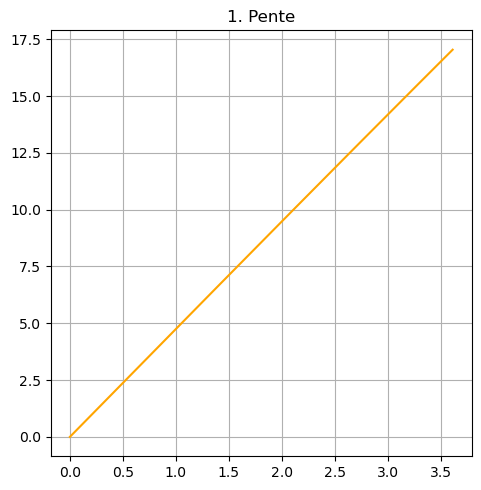

In [1]:
#On importe les bibliothèques nécessaires à nos calculs
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
# CONSTANTES ET PARAMETRES
ro = 1.225
g = 9.81
 
# Configuration du Circuit
L = 31
h = 2
r = 6
l = 9
d = -1
D = 10
alpha = np.arcsin(h / L)
 
# on établies les paramétres des voitures dans des listes 
voitures = [
    [1760, 5.28, 1.95, 1.35, 5.1, 0.38, 0.3, 0.1],
    [1615, 4.51, 1.81, 1.27, 5, 0.29, 0.3, 0.1],
    [1498, 4.72, 1.88, 1.30, 5.3, 0.35, 0.3, 0.1],
    [1385, 4.3, 1.75, 1.23, 5.2, 0.28, 0.3, 0.1],
    [1540, 4.6, 1.79, 1.36, 5.8, 0.34, 0.3, 0.1],
    [1600, 4.51, 1.81, 1.48, 5, 0.28, 0.3, 0.1]
]
 
# Paramètres des Accessoires à dispositions
accessoires = [
    [30, 0, 0, 0.1, 0.8, "ailerons"],
    [0, 0.3, 0, 0, 0, "booster"],
    [15, 0, -0.05, 0, 0, "jupe"]
]
 
# Variables à définir pour tracer/obtenir des resultats
S_pente, t_pente, idx_pente = None, None, 0
S_loop, t_loop, idx_loop = None, None, 0
S_ravin, t_ravin, idx_ravin = None, None, 0
S_fin, t_fin, idx_fin = None, None, 0
tf_pente, tf_loop, tf_ravin, tf_fin = 0, 0, 0, 0
 
# CONFIGURATION du programmme (avec la sélection de voiture,accesoires,portions de circuits ...)
print("\nCONFIGURATION VOITURE")
idVoiture = 0
while idVoiture < 1 or idVoiture > 6:
    print("Tapez le numero de votre voiture :")
    try: idVoiture = int(input(">>> "))
    except ValueError: pass
 
print("\nAjouter un accessoire ? 1: OUI / 2: NON")
try: reponse = int(input(">>> "))
except ValueError: reponse = 2
 
portionsCircuit = []
m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = 0, 0, 0, 0, 0, ""
 
if reponse == 1:
    print("\nQuel accessoire ? 1: ailerons, 2: booster, 3: jupe")
    try:
        idAccessoire = int(input(">>> "))
        if idAccessoire in [1, 2, 3]:
            if idAccessoire == 1: portionsCircuit = [3] 
            elif idAccessoire == 2:
                p_booster = 0
                while p_booster not in [1, 2, 4]: 
                    print("Sur quelle portion ? 1: Pente, 2: Looping, 4: Fin")
                    try: p_booster = int(input(">>> "))
                    except: pass
                portionsCircuit.append(p_booster)
            elif idAccessoire == 3: portionsCircuit = [1, 2, 3, 4] 
            acc = accessoires[idAccessoire-1]
            m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = acc[0], acc[1], acc[2], acc[3], acc[4], acc[5]
            print(f"Accessoire active : {nom_acc}")
    except ValueError: pass
 
def get_car_params(portion_id):
    v = voitures[idVoiture-1]
    m_loc = v[0] + (m_acc if portion_id in portionsCircuit else 0)
    am_loc = v[4] + (am_acc * v[4] if portion_id in portionsCircuit else 0)
    Cx_loc = v[5] + (Cx_acc * v[5] if portion_id in portionsCircuit else 0)
    Cz_loc = v[6] + (Cz_acc * v[6] if portion_id in portionsCircuit else 0)
    Sz_loc = v[1] * v[2] + (Sz_acc if portion_id in portionsCircuit else 0)
    Sx_loc = v[2] * v[3]
    mu_loc = v[7]
    k_loc = 0.5 * Cx_loc * Sx_loc * ro
    return m_loc, am_loc, k_loc, mu_loc, Cx_loc, Cz_loc, Sz_loc, Sx_loc
 
# SIMULATION 1 : PENTE (à l'aide de la fonction odeint qui permet de résoudre les équa diff de 1er degrès)
m, am, k, mu, Cx, Cz, Sz, Sx = get_car_params(1)
t_pente = np.linspace(0, 100, 10000)
S_pente = odeint(lambda S, t: [S[1], (1/m)*(m*g*(np.sin(alpha)-mu*np.cos(alpha)) - k*S[1]**2 + m*am)], [0, 0], t_pente)
 
i = 0
while i < len(t_pente) and S_pente[i, 0] < L: i += 1
 
if i >= len(t_pente):
    print("ERREUR Voiture bloquee sur la pente")
    vf_pente = 0
    idx_pente = len(t_pente)-1
else:
    vf_pente = S_pente[i, 1]
    tf_pente = t_pente[i]
    idx_pente = i
    print(f"\nFin Pente")
    print(f"Vitesse atteinte : {round(vf_pente, 2)} m/s")
 
 
   
# partie qui permet de tracer les GRAPHIQUES à l'aide de la fonction plt
plt.figure(figsize=(18, 5))
 
plt.subplot(1, 4, 1); plt.title("1. Pente")
if S_pente is not None: plt.plot(t_pente[:idx_pente], S_pente[:idx_pente, 1], 'orange')
plt.grid(True)
 
 
plt.tight_layout(); plt.show()


CONFIGURATION VOITURE
Tapez le numero de votre voiture :


>>>  7


Tapez le numero de votre voiture :


>>>  2



Ajouter un accessoire ? 1: OUI / 2: NON


>>>  6



DIAGNOSTIC LOOPING
1. Vitesse actuelle de la voiture : 17.09 m/s
2. Vitesse MINIMUM requise : 14.14 m/s
RESULTAT : SUCCES
Looping termine
Vitesse sortie : 19.35 m/s


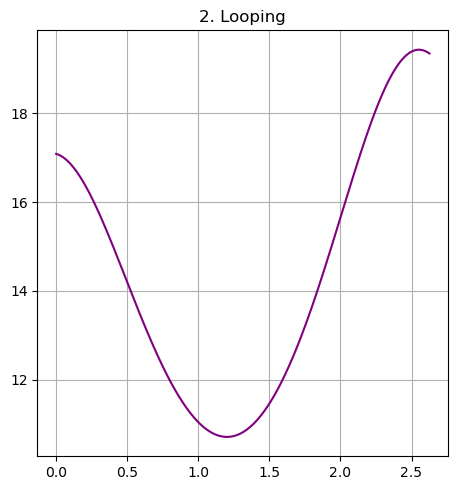

In [9]:
#On importe les bibliothèques nécessaires à nos calculs
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
# CONSTANTES ET PARAMETRES
ro = 1.225
g = 9.81
 
# Circuit
L = 31
h = 2
r = 6
l = 9
d = -1
D = 10
alpha = np.arcsin(h / L)
 
# On établies les paramétres des voitures dans des listes
voitures = [
    [1760, 5.28, 1.95, 1.35, 5.1, 0.38, 0.3, 0.1],
    [1615, 4.51, 1.81, 1.27, 5, 0.29, 0.3, 0.1],
    [1498, 4.72, 1.88, 1.30, 5.3, 0.35, 0.3, 0.1],
    [1385, 4.3, 1.75, 1.23, 5.2, 0.28, 0.3, 0.1],
    [1540, 4.6, 1.79, 1.36, 5.8, 0.34, 0.3, 0.1],
    [1600, 4.51, 1.81, 1.48, 5, 0.28, 0.3, 0.1]
]
 
# Paramètres des Accessoires à dispositions
accessoires = [
    [30, 0, 0, 0.1, 0.8, "ailerons"],
    [0, 0.3, 0, 0, 0, "booster"],
    [15, 0, -0.05, 0, 0, "jupe"]
]
 
# Variables à définir pour tracer/obtenir des resultats
S_pente, t_pente, idx_pente = None, None, 0
S_loop, t_loop, idx_loop = None, None, 0
S_ravin, t_ravin, idx_ravin = None, None, 0
S_fin, t_fin, idx_fin = None, None, 0
tf_pente, tf_loop, tf_ravin, tf_fin = 0, 0, 0, 0
 
# CONFIGURATION du programmme (avec la sélection de voiture,accesoires,portions de circuits ...)
print("\nCONFIGURATION VOITURE")
idVoiture = 0
while idVoiture < 1 or idVoiture > 6:
    print("Tapez le numero de votre voiture :")
    try: idVoiture = int(input(">>> "))
    except ValueError: pass
 
print("\nAjouter un accessoire ? 1: OUI / 2: NON")
try: reponse = int(input(">>> "))
except ValueError: reponse = 2
 
portionsCircuit = []
m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = 0, 0, 0, 0, 0, ""
 
if reponse == 1:
    print("\nQuel accessoire ? 1: ailerons, 2: booster, 3: jupe")
    try:
        idAccessoire = int(input(">>> "))
        if idAccessoire in [1, 2, 3]:
            if idAccessoire == 1: portionsCircuit = [3] 
            elif idAccessoire == 2:
                p_booster = 0
                while p_booster not in [1, 2, 4]: 
                    print("Sur quelle portion ? 1: Pente, 2: Looping, 4: Fin")
                    try: p_booster = int(input(">>> "))
                    except: pass
                portionsCircuit.append(p_booster)
            elif idAccessoire == 3: portionsCircuit = [1, 2, 3, 4] 
            acc = accessoires[idAccessoire-1]
            m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = acc[0], acc[1], acc[2], acc[3], acc[4], acc[5]
            print(f"Accessoire active : {nom_acc}")
    except ValueError: pass
 
def get_car_params(portion_id):
    v = voitures[idVoiture-1]
    m_loc = v[0] + (m_acc if portion_id in portionsCircuit else 0)
    am_loc = v[4] + (am_acc * v[4] if portion_id in portionsCircuit else 0)
    Cx_loc = v[5] + (Cx_acc * v[5] if portion_id in portionsCircuit else 0)
    Cz_loc = v[6] + (Cz_acc * v[6] if portion_id in portionsCircuit else 0)
    Sz_loc = v[1] * v[2] + (Sz_acc if portion_id in portionsCircuit else 0)
    Sx_loc = v[2] * v[3]
    mu_loc = v[7]
    k_loc = 0.5 * Cx_loc * Sx_loc * ro
    return m_loc, am_loc, k_loc, mu_loc, Cx_loc, Cz_loc, Sz_loc, Sx_loc
 
 
# SIMULATION 2 : LOOPING (à l'aide de la fonction odeint qui permet de résoudre les équa diff de 1er degrès)
vf_looping = 0
if vf_pente > 0:
    m, am, k, mu, Cx, Cz, Sz, Sx = get_car_params(2)
    # Retour des mesures de la vitesse de la voiture et le status (réusite/échec)
    vlim_entree = np.sqrt(5 * g * r - am * np.pi * r)
    print(f"\nDIAGNOSTIC LOOPING")
    print(f"1. Vitesse actuelle de la voiture : {round(vf_pente, 2)} m/s")
    print(f"2. Vitesse MINIMUM requise : {round(vlim_entree, 2)} m/s")
    if vf_pente >= vlim_entree:
        print(f"RESULTAT : SUCCES")
    else:
        print(f"RESULTAT : ECHEC")
 
    if vf_pente < vlim_entree:
        print("La voiture n'a pas assez d'elan")
    else:
        t_loop = np.linspace(0, 10, 10000)
        def Sp_looping(S2, t):
            theta, omega = S2[0], S2[1]
            signe = np.sign(omega)
            d_omega = (1 / (m * r)) * (m*am - m*g*np.sin(theta) - m*g*mu*np.cos(theta)*signe - (omega**2)*signe*(mu*r*m + k*r**2))
            return [omega, d_omega]
 
        S_loop = odeint(Sp_looping, [0, vf_pente / r], t_loop)
 
        i, reussi_loop = 0, False
        while i < len(t_loop):
            if m * g * np.cos(S_loop[i, 0]) + m * r * S_loop[i, 1]**2 < 0:
                print(f"ECHEC Decrochage")
                idx_loop = i; break
            if S_loop[i, 0] >= 2 * np.pi:
                reussi_loop = True; idx_loop = i; break
            i += 1
        if reussi_loop:
            vf_looping = S_loop[idx_loop, 1] * r
            tf_loop = t_loop[idx_loop]
            print(f"Looping termine")
            print(f"Vitesse sortie : {round(vf_looping, 2)} m/s")
        else:
            if idx_loop == 0: idx_loop = i
 
 
# Partie qui permet de tracer les GRAPHIQUES à l'aide de la fonction plt
plt.figure(figsize=(18, 5))
 
 
plt.subplot(1, 4, 2); plt.title("2. Looping")
if S_loop is not None: 
    limit = idx_loop if idx_loop > 0 else len(t_loop)
    plt.plot(t_loop[:limit], S_loop[:limit, 1] * r, 'purple')
plt.grid(True)
 
 
plt.tight_layout(); plt.show()


CONFIGURATION VOITURE
Tapez le numero de votre voiture :


>>>  1



Ajouter un accessoire ? 1: OUI / 2: NON


>>>  2



DIAGNOSTIC RAVIN
1. Vitesse actuelle : 19.4 m/s
2. Vitesse MINIMUM : 19.93 m/s
Trop lent
RAVIN NON FRANCHI


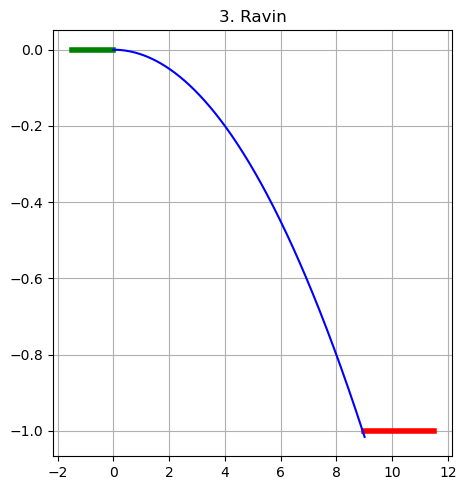

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
 
# CONSTANTES ET PARAMETRES
ro = 1.225
g = 9.81
 
# Circuit
L = 31
h = 2
r = 6
l = 9
d = -1
D = 10
alpha = np.arcsin(h / L)
 
# On établies les paramétres des voitures dans des listes
voitures = [
    [1760, 5.28, 1.95, 1.35, 5.1, 0.38, 0.3, 0.1],
    [1615, 4.51, 1.81, 1.27, 5, 0.29, 0.3, 0.1],
    [1498, 4.72, 1.88, 1.30, 5.3, 0.35, 0.3, 0.1],
    [1385, 4.3, 1.75, 1.23, 5.2, 0.28, 0.3, 0.1],
    [1540, 4.6, 1.79, 1.36, 5.8, 0.34, 0.3, 0.1],
    [1600, 4.51, 1.81, 1.48, 5, 0.28, 0.3, 0.1]
]
 
# Paramètres des Accessoires à dispositions
accessoires = [
    [30, 0, 0, 0.1, 0.8, "ailerons"],
    [0, 0.3, 0, 0, 0, "booster"],
    [15, 0, -0.05, 0, 0, "jupe"]
]
 
# Variables à définir pour tracer/obtenir des resultats
S_pente, t_pente, idx_pente = None, None, 0
S_loop, t_loop, idx_loop = None, None, 0
S_ravin, t_ravin, idx_ravin = None, None, 0
S_fin, t_fin, idx_fin = None, None, 0
tf_pente, tf_loop, tf_ravin, tf_fin = 0, 0, 0, 0
 
# CONFIGURATION du programmme (avec la sélection de voiture,accesoires,portions de circuits ...)
print("\nCONFIGURATION VOITURE")
idVoiture = 0
while idVoiture < 1 or idVoiture > 6:
    print("Tapez le numero de votre voiture :")
    try: idVoiture = int(input(">>> "))
    except ValueError: pass
 
print("\nAjouter un accessoire ? 1: OUI / 2: NON")
try: reponse = int(input(">>> "))
except ValueError: reponse = 2
 
portionsCircuit = []
m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = 0, 0, 0, 0, 0, ""
 
if reponse == 1:
    print("\nQuel accessoire ? 1: ailerons, 2: booster, 3: jupe")
    try:
        idAccessoire = int(input(">>> "))
        if idAccessoire in [1, 2, 3]:
            if idAccessoire == 1: portionsCircuit = [3] 
            elif idAccessoire == 2:
                p_booster = 0
                while p_booster not in [1, 2, 4]: 
                    print("Sur quelle portion ? 1: Pente, 2: Looping, 4: Fin")
                    try: p_booster = int(input(">>> "))
                    except: pass
                portionsCircuit.append(p_booster)
            elif idAccessoire == 3: portionsCircuit = [1, 2, 3, 4] 
            acc = accessoires[idAccessoire-1]
            m_acc, am_acc, Cx_acc, Cz_acc, Sz_acc, nom_acc = acc[0], acc[1], acc[2], acc[3], acc[4], acc[5]
            print(f"Accessoire active : {nom_acc}")
    except ValueError: pass
 
def get_car_params(portion_id):
    v = voitures[idVoiture-1]
    m_loc = v[0] + (m_acc if portion_id in portionsCircuit else 0)
    am_loc = v[4] + (am_acc * v[4] if portion_id in portionsCircuit else 0)
    Cx_loc = v[5] + (Cx_acc * v[5] if portion_id in portionsCircuit else 0)
    Cz_loc = v[6] + (Cz_acc * v[6] if portion_id in portionsCircuit else 0)
    Sz_loc = v[1] * v[2] + (Sz_acc if portion_id in portionsCircuit else 0)
    Sx_loc = v[2] * v[3]
    mu_loc = v[7]
    k_loc = 0.5 * Cx_loc * Sx_loc * ro
    return m_loc, am_loc, k_loc, mu_loc, Cx_loc, Cz_loc, Sz_loc, Sx_loc
 
 
# SIMULATION 3 : RAVIN (à l'aide de la fonction odeint qui permet de résoudre les équa diff de 1er degrès)
reussi_ravin = False
vf_ravin_landing = 0
 
if vf_looping > 0:
    m, am, k, mu, Cx, Cz, Sz, Sx = get_car_params(3)
     # Retour des mesures de la vitesse de la voiture et le status (réusite/échec)
    t_chute_theorique = np.sqrt(2 * abs(d) / g)
    v_min_ravin = l / t_chute_theorique
    print(f"\nDIAGNOSTIC RAVIN")
    print(f"1. Vitesse actuelle : {round(vf_looping, 2)} m/s")
    print(f"2. Vitesse MINIMUM : {round(v_min_ravin, 2)} m/s")
    if vf_looping > v_min_ravin:
        print(f"Vitesse suffisante")
    else:
        print(f"Trop lent")
 
    t_ravin = np.linspace(0, 5, 5000)
    def Sp_ravin(S3, t):
        vx, vy = S3[2], S3[3]
        V = np.sqrt(vx**2 + vy**2)
        return [vx, vy, -ro/(2*m)*V*(Cx*Sx*vx + Cz*Sz*vy), -ro/(2*m)*V*(Cx*Sx*vy - Cz*Sz*vx) - g]
 
    S_ravin = odeint(Sp_ravin, [0, 0, vf_looping, 0], t_ravin)
    idx_ravin = 0
    for i in range(len(t_ravin)):
        x, y = S_ravin[i, 0], S_ravin[i, 1]
        if x >= l: 
            if y >= d: reussi_ravin = True
            idx_ravin = i; break
        if y < d - 2: idx_ravin = i; break
    if idx_ravin == 0: idx_ravin = len(t_ravin)-1
    tf_ravin = t_ravin[idx_ravin]
    vf_ravin_landing = S_ravin[idx_ravin, 2]
    if reussi_ravin: print(f"SIMULATION : RAVIN FRANCHI")
    else: print(f"RAVIN NON FRANCHI")
 
 
# Partie qui permet de tracer les GRAPHIQUES à l'aide de la fonction plt
plt.figure(figsize=(18, 5))
 
 
plt.subplot(1, 4, 3); plt.title("3. Ravin")
plt.plot([-1.5, 0], [0, 0], 'g', lw=4); plt.plot([l, l+2.5], [d, d], 'r', lw=4)
if S_ravin is not None:
    limit = idx_ravin if idx_ravin > 0 else len(t_ravin)
    plt.plot(S_ravin[:limit+1, 0], S_ravin[:limit+1, 1], 'b')
plt.grid(True)
 
 
plt.tight_layout(); plt.show()

Vitesse après 10 mètres : 9.07 m/s (32.64 km/h)


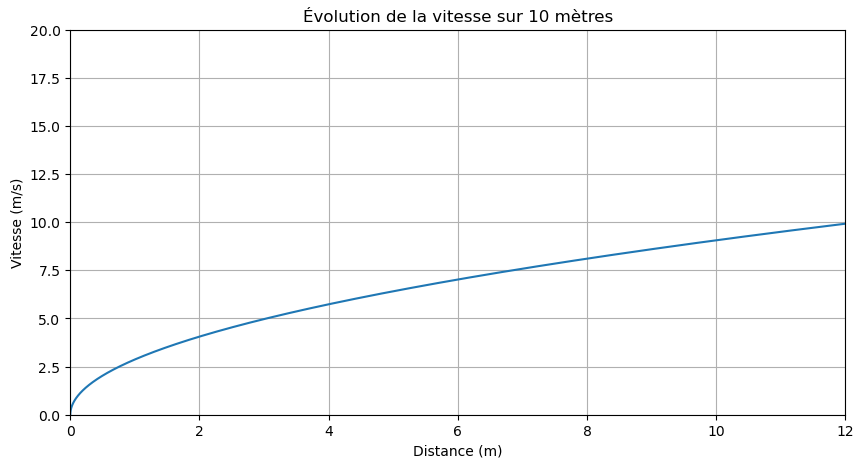

In [5]:
# Importation des bibliothèques nécessaires au calcul
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# ----------------------------------------------------
# Déclaration des constantes utilisées dans notre programme
# ----------------------------------------------------
m = 1760              # masse (kg)
a_v = 5.1             # accélération moteur moyenne (m/s²)
mu_D = 0.1            # coefficient de frottement de roulement
g = 9.81              # gravité (m/s²)
Cx = 0.38             # coefficient aérodynamique
Largeur = 1.95        # m
Hauteur = 1.35        # m
Sx = Largeur * Hauteur # Calcul de la surface frontale Sx
rho = 1.202           # densité air (kg/m³)
# ----------------------------------------------------
# Déclaration des conditions initiales de l'équation
# ----------------------------------------------------
v0 = 0                # vitesse initiale (m/s)
x0 = 0                # position initiale (m)
Sp0 = [x0, v0]        # vecteur d'état [position, vitesse]                                                     # ----------------------------------------------------
# Déclaration de l'équation différentielle et de ses paramètres
# Sp = [x, v]
# ----------------------------------------------------
def equa(Sp, t):
    x, v = Sp
    dvdt = a_v - mu_D * g - (rho * Cx * Sx / (2*m)) * v**2
    dxdt = v
    return [dxdt, dvdt]

# ----------------------------------------------------
# Résolution de l'équation différentielle jusqu'à 10 m à l'aide de la fonction odeint
# ----------------------------------------------------
t = np.linspace(0, 10, 5000)   # temps suffisamment long
solution = odeint(equa, Sp0, t)
x = solution[:, 0]
v = solution[:, 1]
# Trouver la vitesse lorsque x = 10 m
index_10m = np.where(x >= 10)[0][0]
v_10m = v[index_10m]
print(f"Vitesse après 10 mètres : {v_10m:.2f} m/s ({v_10m*3.6:.2f} km/h)")                       # ----------------------------------------------------
# Représentation graphique à l'aide de la fonction plt
# ----------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(x, v)
plt.xlabel("Distance (m)")
plt.ylabel("Vitesse (m/s)")
plt.title("Évolution de la vitesse sur 10 mètres")
plt.grid(True)
plt.xlim(0, 12)     # Limite axe x de 0 à 12 m
plt.ylim(0, 20)     # Limite axe y de 0 à 20 m/s 
plt.show()